In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix

from sklearn.metrics import roc_curve,roc_auc_score
import plotly.express as px


import warnings
warnings.filterwarnings('ignore')

In [28]:
df=pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [29]:
df.drop('Id',axis=1,inplace=True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [31]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# SepalLengthCm

<AxesSubplot:xlabel='SepalLengthCm'>

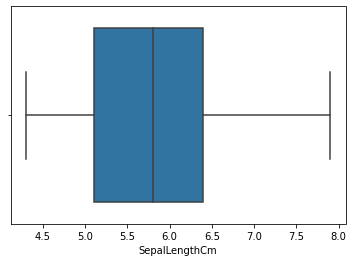

In [32]:
sns.boxplot(df['SepalLengthCm'])

# SepalWidthCm

<AxesSubplot:xlabel='SepalWidthCm'>

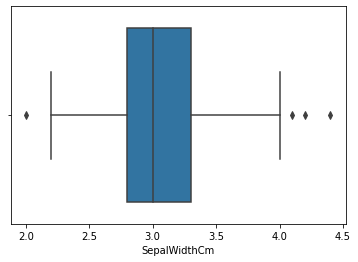

In [33]:
sns.boxplot(df['SepalWidthCm'])

In [34]:
q1=df['SepalWidthCm'].quantile(0.25)
q3=df['SepalWidthCm'].quantile(0.75)

iqr=q3-q1
uppertail=q3+(1.5*iqr)
lowertail=q1-(1.5*iqr)
print(uppertail)
print(lowertail)

4.05
2.05


In [35]:
df.loc[df['SepalWidthCm'] > uppertail, 'SepalWidthCm']=uppertail
df.loc[df['SepalWidthCm'] < lowertail, 'SepalWidthCm'] = lowertail


# PetalLengthCm

<AxesSubplot:xlabel='PetalLengthCm'>

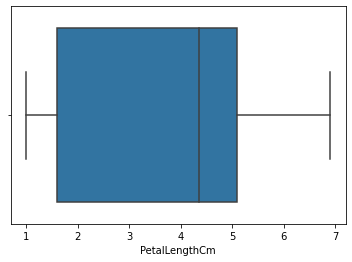

In [36]:
sns.boxplot(df['PetalLengthCm'])

# PetalWidthCm

<AxesSubplot:xlabel='PetalWidthCm'>

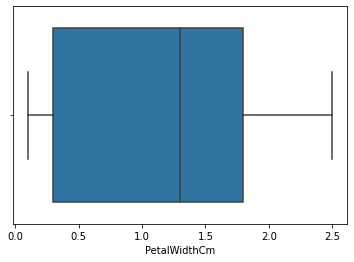

In [37]:
sns.boxplot(df['PetalWidthCm'])

In [38]:
x=df.drop('Species',axis=1)
y=df['Species']

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10,stratify=y)

In [40]:
logistic_model=LogisticRegression(multi_class='ovr')
logistic_model.fit(x_train,y_train)

LogisticRegression(multi_class='ovr')

In [41]:
# Testing data

# prediction
y_pred = logistic_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cnf_matrix)

print("*"*45)
# Visualization
multilabel_cnf_matrix = multilabel_confusion_matrix(y_test, y_pred)
print("multilabel_cnf_matrix :\n",multilabel_cnf_matrix)

print("*"*45)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:",accuracy)
print("*"*45)

clf_report = classification_report(y_test, y_pred)
print("Classification report:\n",clf_report)

Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
*********************************************
multilabel_cnf_matrix :
 [[[20  0]
  [ 0 10]]

 [[20  0]
  [ 0 10]]

 [[20  0]
  [ 0 10]]]
*********************************************
Accuracy Score: 1.0
*********************************************
Classification report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [42]:
# training data

# prediction
y_pred_train = logistic_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n",cnf_matrix)

print("*"*45)
# Visualization
multilabel_cnf_matrix = multilabel_confusion_matrix(y_train, y_pred_train)
print("multilabel_cnf_matrix :\n",multilabel_cnf_matrix)

print("*"*45)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy Score:",accuracy)
print("*"*45)

clf_report = classification_report(y_train, y_pred_train)
print("Classification report:\n",clf_report)

Confusion Matrix:
 [[40  0  0]
 [ 0 35  5]
 [ 0  2 38]]
*********************************************
multilabel_cnf_matrix :
 [[[80  0]
  [ 0 40]]

 [[78  2]
  [ 5 35]]

 [[75  5]
  [ 2 38]]]
*********************************************
Accuracy Score: 0.9416666666666667
*********************************************
Classification report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        40
Iris-versicolor       0.95      0.88      0.91        40
 Iris-virginica       0.88      0.95      0.92        40

       accuracy                           0.94       120
      macro avg       0.94      0.94      0.94       120
   weighted avg       0.94      0.94      0.94       120



In [43]:
column_names=x.columns
column_names

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [46]:
project_data={'columns':list(column_names)}
project_data

{'columns': ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']}

In [47]:
import pickle

with open('logistic_model.pkl','wb')as f:
    pickle.dump(logistic_model,f)

In [48]:
import json

with open('project_data.json','w') as f:
    json.dump(project_data,f)